In [50]:
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats import weightstats
import numpy as np
import pandas as pd
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

In [52]:
warnings.filterwarnings('ignore')

In [53]:
df = pd.read_csv('COVID-19 Activity.csv')

In [54]:
data = pd.DataFrame(df)

In [55]:
data.head()

,PEOPLE_POSITIVE_CASES_COUNT,COUNTY_NAME,PROVINCE_STATE_NAME,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,0,Greene,Alabama,2020-01-21,America,New York Times,0,1063.0,USA,United States,US,0,0
1,0,Greene,Alabama,2020-01-22,America,New York Times,0,1063.0,USA,United States,US,0,0
2,0,Greene,Alabama,2020-01-23,America,New York Times,0,1063.0,USA,United States,US,0,0
3,0,Greene,Alabama,2020-01-24,America,New York Times,0,1063.0,USA,United States,US,0,0
4,0,Greene,Alabama,2020-01-25,America,New York Times,0,1063.0,USA,United States,US,0,0


In [56]:
data = data.drop(['COUNTY_NAME','PROVINCE_STATE_NAME'], axis=1)

In [57]:
data.head()

,PEOPLE_POSITIVE_CASES_COUNT,REPORT_DATE,CONTINENT_NAME,DATA_SOURCE_NAME,PEOPLE_DEATH_NEW_COUNT,COUNTY_FIPS_NUMBER,COUNTRY_ALPHA_3_CODE,COUNTRY_SHORT_NAME,COUNTRY_ALPHA_2_CODE,PEOPLE_POSITIVE_NEW_CASES_COUNT,PEOPLE_DEATH_COUNT
0,0,2020-01-21,America,New York Times,0,1063.0,USA,United States,US,0,0
1,0,2020-01-22,America,New York Times,0,1063.0,USA,United States,US,0,0
2,0,2020-01-23,America,New York Times,0,1063.0,USA,United States,US,0,0
3,0,2020-01-24,America,New York Times,0,1063.0,USA,United States,US,0,0
4,0,2020-01-25,America,New York Times,0,1063.0,USA,United States,US,0,0


In [58]:
data = data.drop(['DATA_SOURCE_NAME','PEOPLE_DEATH_NEW_COUNT','COUNTY_FIPS_NUMBER','COUNTRY_ALPHA_3_CODE'], axis=1)

In [59]:
data = data.drop(['COUNTRY_ALPHA_2_CODE','PEOPLE_POSITIVE_NEW_CASES_COUNT','PEOPLE_POSITIVE_CASES_COUNT'],axis=1)

In [60]:
data = data.drop(['REPORT_DATE'], axis=1)

In [61]:
data

,CONTINENT_NAME,COUNTRY_SHORT_NAME,PEOPLE_DEATH_COUNT
0,America,United States,0
1,America,United States,0
2,America,United States,0
3,America,United States,0
4,America,United States,0
...,...,...,...
1356964,Oceania,New Caledonia,0
1356965,Africa,Cameroon,0
1356966,America,Trinidad and Tobago,0
1356967,Asia,Thailand,0


In [62]:
data.CONTINENT_NAME.unique()

array(['America', 'Oceania', 'Europe', 'Asia', 'Africa', nan],
      dtype=object)

In [63]:
data1 = data.loc[data['CONTINENT_NAME']=='Oceania']
data2 = data.loc[data['CONTINENT_NAME']=='Asia']
d = data.loc[data['CONTINENT_NAME']=='Europe']
data2 = data2.append(d)
data3 = data.loc[data['CONTINENT_NAME']=='America']

In [64]:
d = data1.groupby('COUNTRY_SHORT_NAME')
d2 = data2.groupby('COUNTRY_SHORT_NAME')
d3 = data3.groupby('COUNTRY_SHORT_NAME')

In [65]:
mean1 = d.mean()
mean2 = d2.mean()
mean3 = d3.mean()

In [66]:
mean_total = mean1.append(mean2)

In [67]:
mean_total = mean_total.append(mean3)

In [68]:
mean_total

,PEOPLE_DEATH_COUNT
COUNTRY_SHORT_NAME,
Australia,54.365862
Fiji,0.926893
French Polynesia,25.827676
Marshall Islands,0.000000
New Caledonia,0.000000
...,...
Trinidad and Tobago,46.859008
Turks and Caicos Islands,3.086162
United States,48.923495


In [69]:
m1 = mean_total.mean()
m2 = mean_total.std()

In [70]:
print("mean: ", m1)

mean:  PEOPLE_DEATH_COUNT    3668.535432
dtype: float64


In [71]:
print("standard deviation: ", m2)

standard deviation:  PEOPLE_DEATH_COUNT    11125.811714
dtype: float64


In [72]:
weightstats.ztest(mean_total['PEOPLE_DEATH_COUNT'], x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)

(4.157761507316944, 3.2138128239574595e-05)

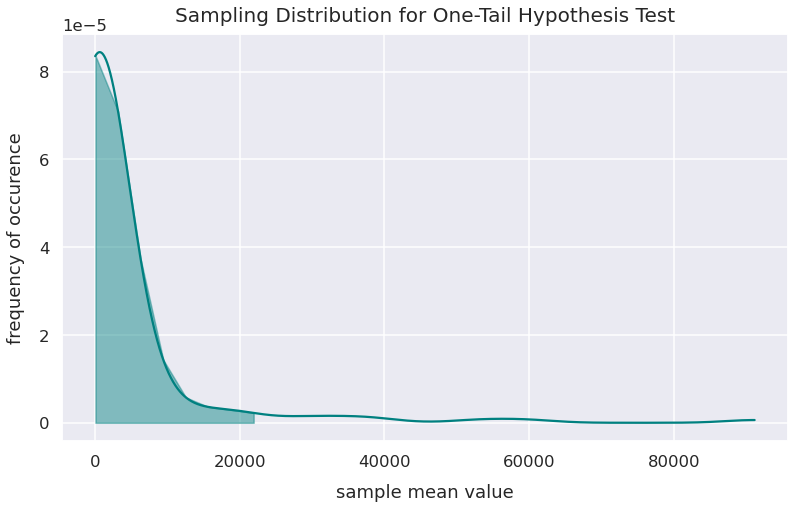

In [76]:
two_std_from_mean = np.mean(mean_total['PEOPLE_DEATH_COUNT']) + np.std(mean_total['PEOPLE_DEATH_COUNT'])*1.645
kde = stats.gaussian_kde(mean_total['PEOPLE_DEATH_COUNT'])
pos = np.linspace(np.min(mean_total['PEOPLE_DEATH_COUNT']), np.max(mean_total['PEOPLE_DEATH_COUNT']), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 40, 8)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title("Sampling Distribution for One-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

In [74]:
round(1-stats.norm.cdf(1.645), 2)

0.05

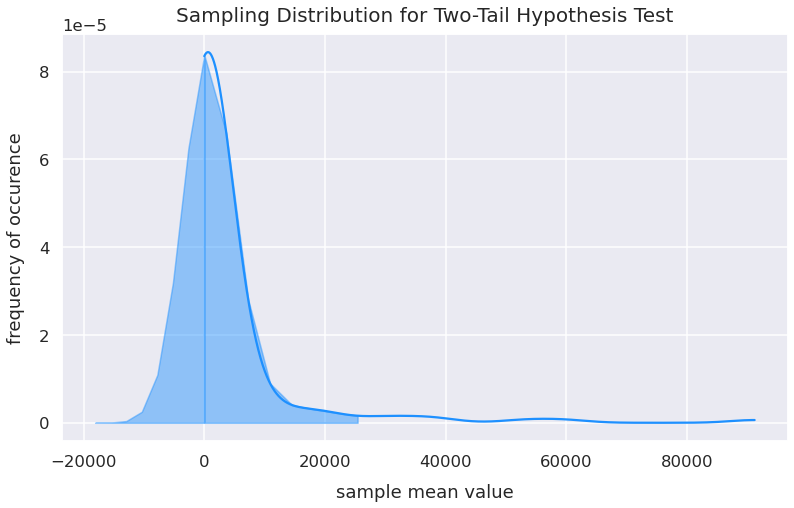

In [78]:
alpha_05_positive = np.mean(mean_total['PEOPLE_DEATH_COUNT']) + np.std(mean_total['PEOPLE_DEATH_COUNT'])*1.96
alpha_05_negative = np.mean(mean_total['PEOPLE_DEATH_COUNT']) - np.std(mean_total['PEOPLE_DEATH_COUNT'])*1.96
kde = stats.gaussian_kde(mean_total['PEOPLE_DEATH_COUNT'])
pos = np.linspace(np.min(mean_total['PEOPLE_DEATH_COUNT']), np.max(mean_total['PEOPLE_DEATH_COUNT']), 10000)
plt.plot(pos, kde(pos), color='dodgerblue')
shade = np.linspace(alpha_05_positive, 40, 8)
plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')
shade2 = np.linspace(alpha_05_negative, -40, 8)
plt.fill_between(shade2, kde(shade2), alpha=0.45, color='dodgerblue')
plt.title("Sampling Distribution for Two-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);